# Libray Import

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [68]:
import os

path = os.listdir('/content/drive/MyDrive/ML_Project -2024/Brain-tumor-detection/Brain Tumer/Training')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [67]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/ML_Project -2024/Brain-tumor-detection/Brain Tumer/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [69]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [71]:
np.unique(Y)

array([0, 1])

In [72]:
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [73]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

# Visualize data

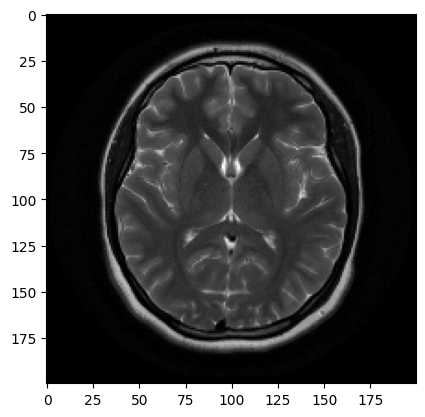

In [74]:
plt.imshow(X[0], cmap='gray')

# Prepare data

In [75]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

# Split Data

In [76]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [77]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

# Feature Scaling

In [78]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# Feature Selection: PCA

In [79]:
from sklearn.decomposition import PCA

In [80]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


# Train Model

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [98]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [99]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

# Evaluation

In [100]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9510204081632653


In [101]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9928352098259979
Testing Score: 0.9510204081632653


# Prediction

In [102]:
pred = sv.predict(xtest)

In [103]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  4,  18,  49,  54,  76,  83,  99, 117, 138, 165, 171, 184]),)

In [104]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  12
1 1


# TEST MODEL

In [105]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

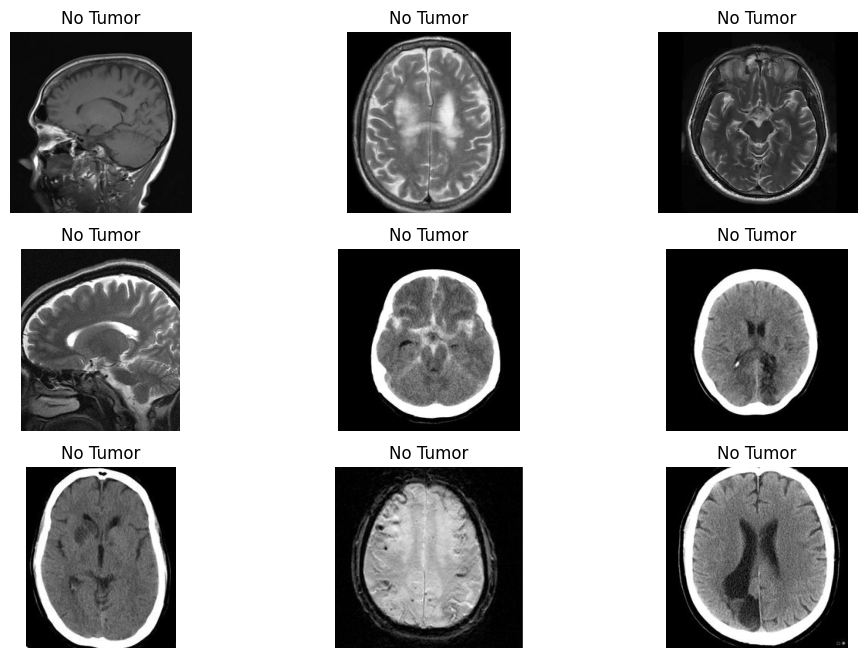

In [106]:
# Now your model is fitted, and you can use it to predict the test data
plt.figure(figsize=(12,8))
c = 1
for i in os.listdir('/content/drive/MyDrive/ML_Project -2024/Brain-tumor-detection/Brain Tumer/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    img = cv2.imread('/content/drive/MyDrive/ML_Project -2024/Brain-tumor-detection/Brain Tumer/Testing/no_tumor/' + i, 0)
    img_resized = cv2.resize(img, (200, 200))
    img_flattened = img_resized.flatten().reshape(1, -1) / 255.0
    prediction = sv.predict(img_flattened)
    plt.title('No Tumor' if prediction[0] == 0 else 'Tumor')  # Adjust according to how your labels are defined
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

plt.show()

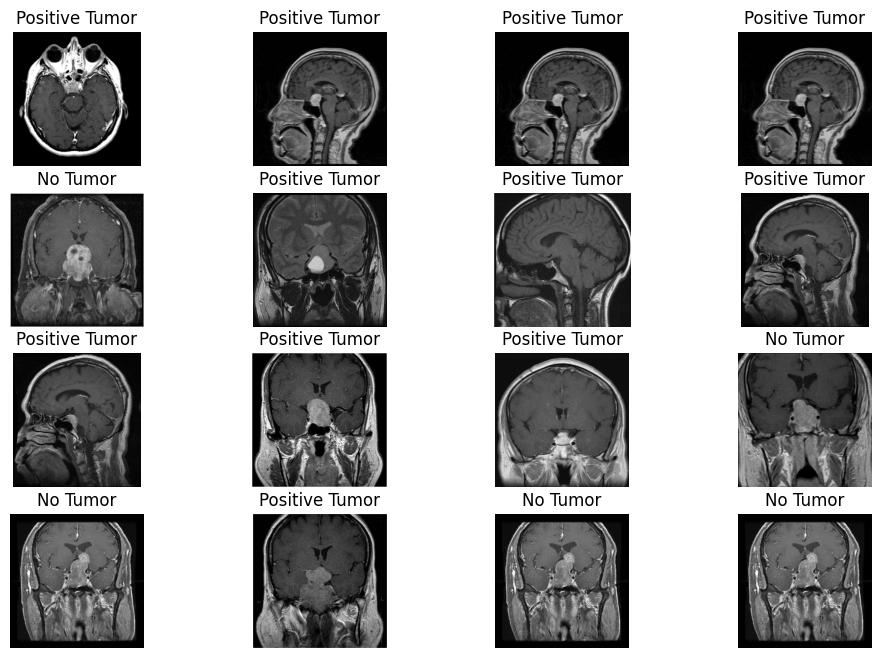

In [107]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/ML_Project -2024/Brain-tumor-detection/Brain Tumer/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/ML_Project -2024/Brain-tumor-detection/Brain Tumer/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)

    img = cv2.imread('/content/drive/MyDrive/ML_Project -2024/Brain-tumor-detection/Brain Tumer/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1